# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

df["Mouse ID"].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# df.groupby(["Mouse ID", "Timepoint"]).size().sort_values()
duplicate_mice = df.groupby(['Mouse ID', 'Timepoint']).filter(lambda x: len(x) > 1)
print(duplicate_mice)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female 

In [4]:
# Optional: Get all the data for the duplicate mouse ID.

mask = df["Mouse ID"] == "g989"
df.loc[mask]


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mask = df["Mouse ID"] != "g989"

df2=df.loc[mask].reset_index(drop=True)

df2


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1875,r944,45,41.581521,2,Capomulin,Male,12,25
1876,u364,45,31.023923,3,Capomulin,Male,18,17
1877,p438,45,61.433892,1,Ceftamin,Female,11,26
1878,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.

df2["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = df2.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

pd.DataFrame({
    "Mean Tumor Volume": mean_tumor,
    "Median Tumor Volume": median_tumor,
    "Tumor Volume Variance": var_tumor,
    "Tumor Volume Std. Var.": stddev_tumor,
    "Tumor Volume Std. Err.":sem_tumor
    
}).reset_index()


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Var.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

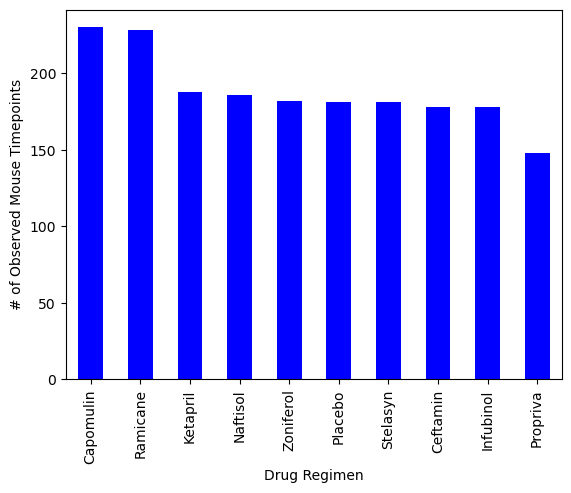

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

df2.groupby("Drug Regimen").size().sort_values(ascending=False).plot(kind="bar",ylabel="# of Observed Mouse Timepoints", color="blue")
plt.show()


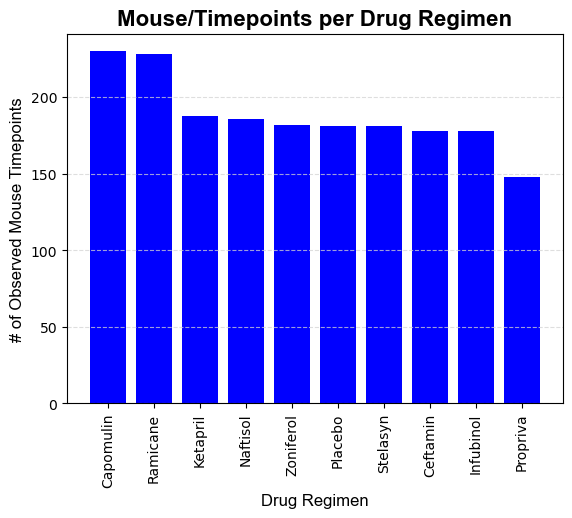

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Data Viz Recipe
data = df2.groupby("Drug Regimen").size().sort_values(ascending=False)

# Change Canvas Size
# plt.figure(figsize=(8, 4))

# Create a basic plot
plt.bar(data.index, data.values, color="blue", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints", fontfamily="Arial", fontsize=12)
plt.title("Mouse/Timepoints per Drug Regimen", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()


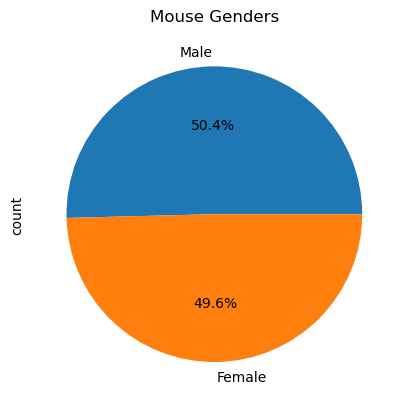

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mouse_gender = df2[["Mouse ID", "Sex"]].drop_duplicates()
data=mouse_gender.Sex.value_counts()


# Make the pie chart
data.plot(kind="pie", title="Mouse Genders", autopct="%1.1f%%")
plt.show()


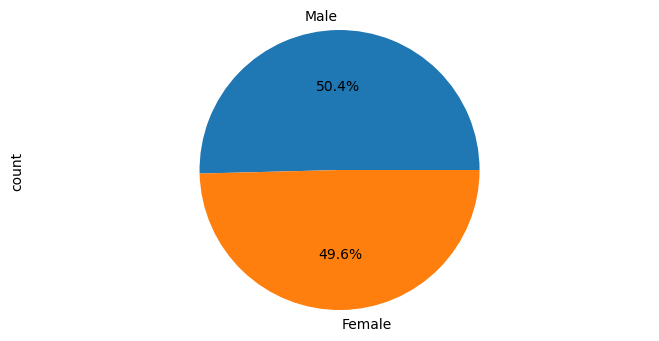

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart

# Data Viz Recipe
data=mouse_gender.Sex.value_counts()

# Change Canvas Size
plt.figure(figsize=(8, 4))

# Create a basic plot
plt.pie(data, labels=data.index,autopct='%1.1f%%')

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.ylabel("count")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Start by getting the last (greatest) timepoint for each mouse
max_time = df2.groupby("Mouse ID").Timepoint.max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df3 = pd.merge(max_time, df2, on=["Mouse ID", "Timepoint"], how="left")

meds = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mask = df3["Drug Regimen"].isin(meds)
df3 = df3.loc[mask].reset_index(drop=True)


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = df3['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vols = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Iterate through each treatment
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = df3.loc[df3['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # add subset
    tumor_vols.append(treatment_data)
    
    # Calculate IQR for outlier detection
    q1 = np.percentile(treatment_data, 25)
    q3 = np.percentile(treatment_data, 75)
    iqr = q3 - q1
    
    # Determine outliers using upper and lower bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    
    # Identify outliers
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"Outliers for {treatment}: {outliers.tolist()}")


Outliers for Infubinol: [36.3213458]
Outliers for Ceftamin: []
Outliers for Ramicane: []
Outliers for Capomulin: []


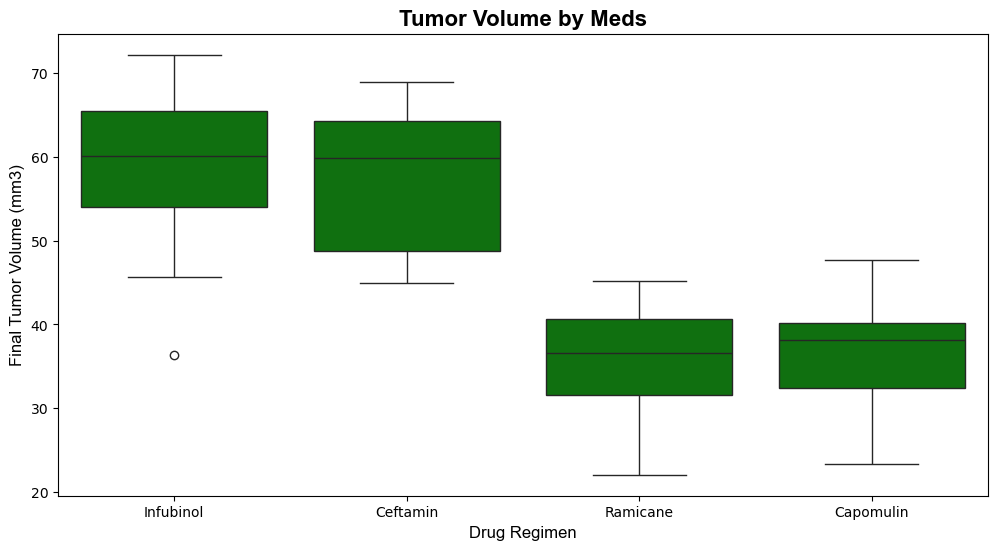

In [47]:
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
sns.boxplot(data=df3, y="Tumor Volume (mm3)", x="Drug Regimen", color="green")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Drug Regimen", fontfamily="Arial", fontsize=12)
plt.ylabel("Final Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Tumor Volume by Meds", fontweight="bold", fontsize=16, fontfamily="Arial")

# Show/Save the Graph
plt.show()


## Line and Scatter Plots

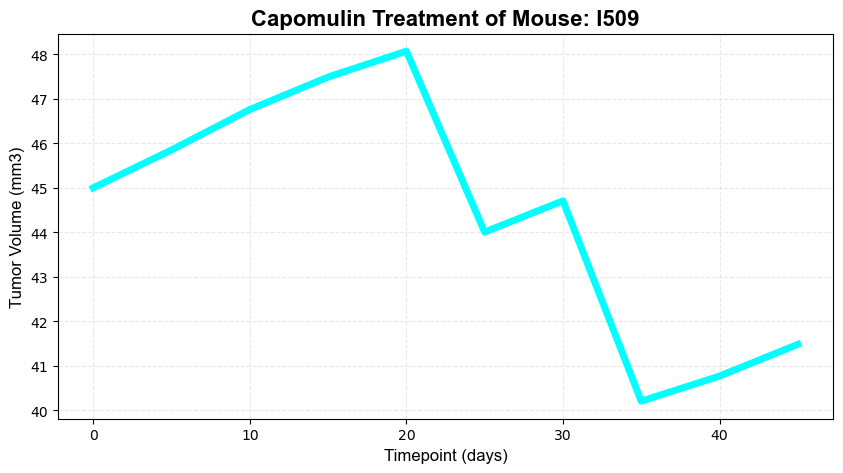

In [73]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse = "l509"

df4 = df2.loc[df2["Mouse ID"] == mouse].sort_values(by="Timepoint", ascending=True)

# df4.plot(kind="line", x="Timepoint", y="Tumor Volume (mm3)")

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.plot(df4.Timepoint, df4["Tumor Volume (mm3)"], color="aqua", linewidth=5)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title1509
plt.xlabel("Timepoint (days)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title(f"Capomulin Treatment of Mouse: {mouse}", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.5)

# Show/Save the Graph
plt.show()

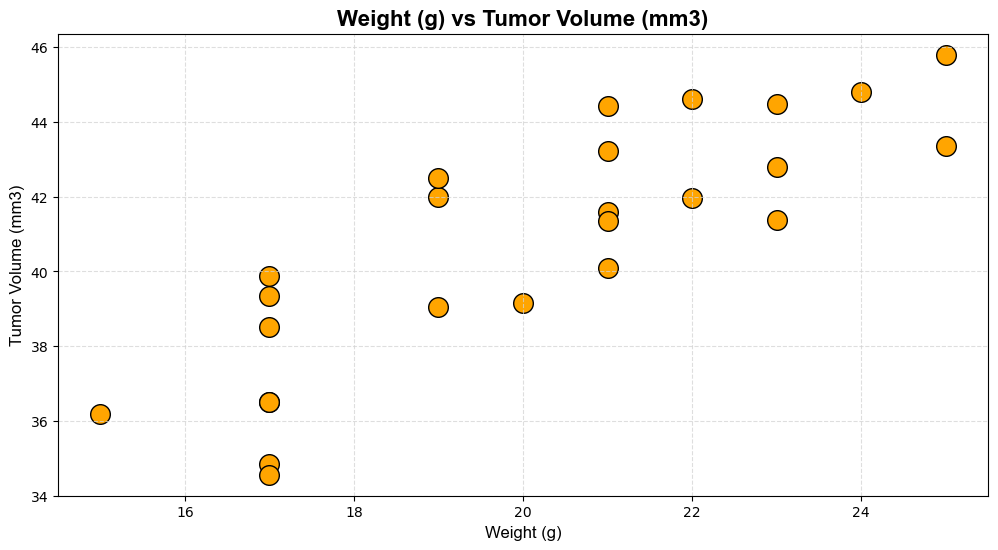

In [77]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
regimen = "Capomulin"

df5 = df2.loc[df2["Drug Regimen"] == regimen]
df6 = df5.groupby("Mouse ID").agg({"Tumor Volume (mm3)": "mean", "Weight (g)": "mean"}).reset_index()

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.scatter(df6["Weight (g)"], df6["Tumor Volume (mm3)"], color="orange", edgecolor="black", s=200)

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

## Correlation and Regression

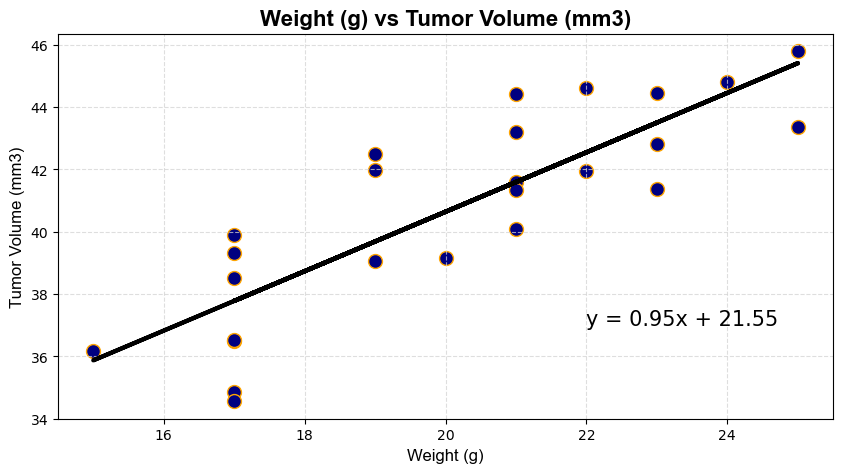

In [84]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Add the linear regression equation and line to plot
x_values = df6["Weight (g)"]
y_values = df6["Tumor Volume (mm3)"]

# do regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept # these are the points/predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Change Canvas Size
plt.figure(figsize=(10, 5))

# Create a basic plot
plt.scatter(df6["Weight (g)"], df6["Tumor Volume (mm3)"], color="navy", edgecolor="orange", s=100)
plt.plot(df6["Weight (g)"], regress_values, color="black", linewidth=3) # the regression line

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Weight (g)", fontfamily="Arial", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontfamily="Arial", fontsize=12)
plt.title("Weight (g) vs Tumor Volume (mm3)", fontweight="bold", fontsize=16, fontfamily="Arial")

# # Set X/Y Limits
# plt.ylim(0, 90)
# plt.xlim(-2, 75)

# Add in a background grid
plt.grid(linestyle="--", color="lightgrey", alpha=0.75)

# Annotate
plt.annotate(line_eq, (22, 37), fontsize=15, color="black")

# Show/Save the Graph
plt.show()